## Intro

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [3]:
os.chdir('/Users/timothymiller/Desktop/CurrentProjects/Dataset-SS')

In [4]:
# excel file of 4 sheets
file = pd.ExcelFile('schoolshootingdatabase.xlsx')

In [5]:
all_sheets = file.sheet_names # gets list of all sheet names
dfs = {sheet: file.parse(sheet) for sheet in all_sheets} # dictionary of dataframes for each sheet

In [6]:
for sheetname in all_sheets:
    print(sheetname)

Cover
Incident
Shooter
Victim
Weapon


In [7]:
incident = dfs['Incident']
shooter = dfs['Shooter']
victim = dfs['Victim']
weapon = dfs['Weapon']

# Incident Dataset

## EDA / Cleanup

In [8]:
# will not be using 2023 data, incomplete
incident = incident[incident['Year'] != 2023]

In [9]:
incident.head()

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Situation,Targets,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI
90,20221221CTNEN,12,21,2022,2022-12-21,New Haven Public Schools,0,0,0,0,...,NaN,Neither,No,No,No,No,No,No,No,No
91,20221221CAWOW,12,21,2022,2022-12-21,Woodland Christian School,0,0,0,0,...,Illegal Activity,Random Shooting,Yes,No,No,No,No,No,NaN,No
92,20221216ILBEC,12,16,2022,2022-12-16,Benito Juarez High School,2,2,4,0,...,Escalation of Dispute,Both,No,No,No,No,NaN,No,NaN,No
93,20221214OHLIC,12,14,2022,2022-12-14,Linden-McKinley STEM Academy,0,0,0,0,...,NaN,NaN,NaN,No,No,No,NaN,No,NaN,No
94,20221212ORGRP,12,12,2022,2022-12-12,Grover Cleveland High School,0,1,1,0,...,NaN,Victims Targeted,NaN,No,No,No,No,No,NaN,No


In [10]:
columns = incident.columns
print(columns)

Index(['Incident_ID', 'Month', 'Day', 'Year', 'Date', 'School',
       'Victims_Killed', 'Victims_Wounded', 'Number_Victims', 'Shooter_Killed',
       'Source', 'Number_News', 'Media_Attention', 'Reliability', 'Quarter',
       'City', 'State', 'School_Level', 'Location', 'Location_Type',
       'During_School', 'Time_Period', 'First_Shot', 'Duration_min', 'Summary',
       'Narrative', 'Situation', 'Targets', 'Accomplice', 'Hostages',
       'Barricade', 'Officer_Involved', 'Bullied', 'Domestic_Violence',
       'Gang_Related', 'Active_Shooter_FBI'],
      dtype='object')


In [11]:
count_by_year = incident['Year'].value_counts().reset_index()
count_by_year.columns = ['Year', 'Total']

In [12]:
bin_num = incident['Year'].max() - incident['Year'].min()

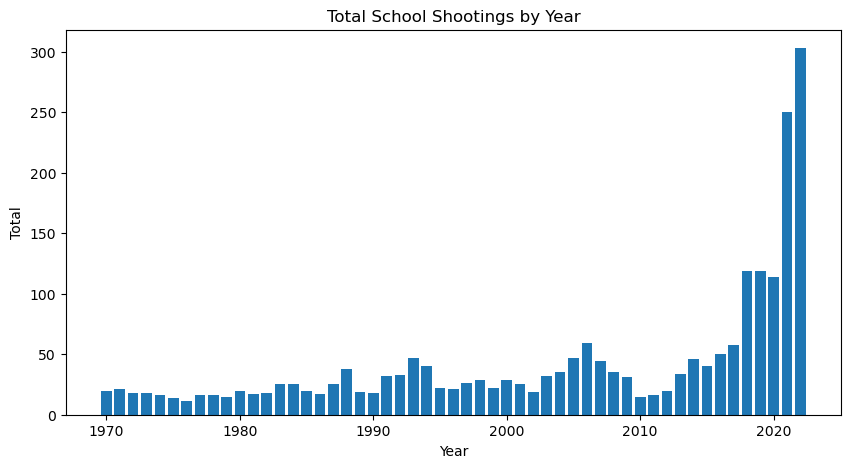

In [13]:
plt.figure(figsize=(10,5)) # You can adjust the size as you need
plt.bar(count_by_year['Year'], count_by_year['Total'])
plt.xlabel('Year')
plt.ylabel('Total')
plt.title('Total School Shootings by Year')
plt.show()

In [14]:
count_by_situation = incident['Situation'].value_counts().reset_index()

In [15]:
count_by_targets = incident['Targets'].value_counts().reset_index()

In [16]:
# specify dataframe of incidents where there is at least 1 fatality
fatal_incidents = incident[(incident['Victims_Killed'] >= 1) | (incident['Shooter_Killed'] >= 1)]

In [17]:
incident.dtypes

Incident_ID                   object
Month                          int64
Day                            int64
Year                           int64
Date                  datetime64[ns]
School                        object
Victims_Killed                 int64
Victims_Wounded                int64
Number_Victims                 int64
Shooter_Killed                 int64
Source                        object
Number_News                  float64
Media_Attention               object
Reliability                    int64
Quarter                       object
City                          object
State                         object
School_Level                  object
Location                      object
Location_Type                 object
During_School                 object
Time_Period                   object
First_Shot                    object
Duration_min                 float64
Summary                       object
Narrative                     object
Situation                     object
T

In [18]:
# number of shootings in each state
state_counts = incident['State'].value_counts()
state_counts_fatal = fatal_incidents['State'].value_counts()
# Convert the series to dataframes
state_counts_df = state_counts.reset_index()
state_counts_fatal_df = state_counts_fatal.reset_index()

# Rename the columns
state_counts_df.columns = ['State', 'Total School Shootings']
state_counts_fatal_df.columns = ['State', 'Fatal School Shootings']

# Merge the dataframes
state_counts_df = pd.merge(state_counts_df, state_counts_fatal_df, on='State')

state_counts_df['Fatal / Total'] = state_counts_df['Fatal School Shootings']/state_counts_df['Total School Shootings'] 

In [19]:
state_counts_df.columns

Index(['State', 'Total School Shootings', 'Fatal School Shootings',
       'Fatal / Total'],
      dtype='object')

In [20]:
state_counts_df.sort_values(by='Fatal / Total', ascending=False)

,State,Total School Shootings,Fatal School Shootings,Fatal / Total
48,WY,2,2,1.000000
46,VT,3,2,0.666667
45,ME,5,3,0.600000
19,DC,37,17,0.459459
16,WA,48,22,0.458333
42,RI,7,3,0.428571
30,AZ,21,9,0.428571
29,NJ,21,9,0.428571
22,CO,31,13,0.419355
15,MO,51,21,0.411765


In [21]:
situation_counts = incident['Situation'].value_counts().reset_index()
situation_counts.columns = ['Situation', 'Count']
situation_counts

,Situation,Count
0,Escalation of Dispute,763
1,Accidental,220
2,Drive-by Shooting,156
3,Suicide/Attempted,148
4,Illegal Activity,144
5,Indiscriminate Shooting,105
6,Domestic w/ Targeted Victim,95
7,Unknown,78
8,Anger Over Grade/Suspension/Discipline,58
9,Intentional Property Damage,57


In [22]:
accidental = incident[incident['Situation'] == 'Accidental']

In [23]:
accidental['Summary']

105                            Student shot inside school
109           Bullet struck school window of occupied bus
112     Officer fired gun during training scenario wou...
119     Gun felt out of man's pants, fired when it hit...
122     Officer shot with live round during active sho...
                              ...                        
2281       Fatally wounded self from accidental discharge
2284    Showing pistol on playground, accidental disch...
2296                    Accidentally fired gun inside car
2307              Occurred during horseplay in the school
2308    Didn't know how to operate pistol, cocked hamm...
Name: Summary, Length: 220, dtype: object

In [24]:
accidental_by_state = accidental['State'].value_counts().reset_index()
accidental_by_state.columns = ['State', 'Count']

accidental_by_state

,State,Count
0,TX,29
1,CA,20
2,FL,19
3,MI,13
4,TN,11
5,GA,11
6,NY,10
7,OH,10
8,MD,7
9,NC,7


In [25]:
incident[incident['Victims_Killed'] == incident['Victims_Killed'].max()]

,Incident_ID,Month,Day,Year,Date,School,Victims_Killed,Victims_Wounded,Number_Victims,Shooter_Killed,...,Situation,Targets,Accomplice,Hostages,Barricade,Officer_Involved,Bullied,Domestic_Violence,Gang_Related,Active_Shooter_FBI
1223,20121214CTSAN,12,14,2012,2012-12-14,Sandy Hook Elementary School,26,0,26,1,...,Indiscriminate Shooting,Random Shooting,No,No,No,No,NaN,No,No,Yes


In [26]:
indiscriminate_shooting = incident[incident['Situation'] == 'Indiscriminate Shooting']

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7bd49d2520>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7bd49d29a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7bd49d2250>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7bd49d2f40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7bd499b250>],
 'means': []}

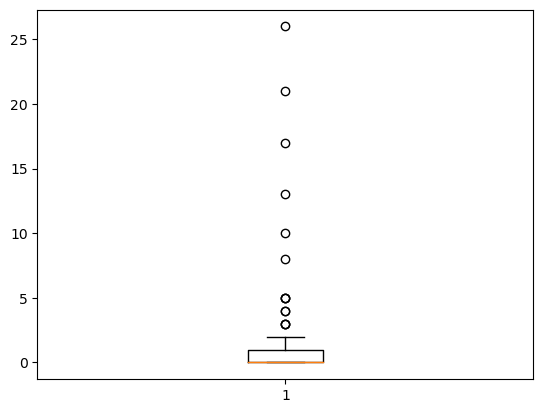

In [27]:
plt.boxplot(indiscriminate_shooting['Victims_Killed'])

In [28]:
# mean number of victims for each situation
mean_victims_situation = incident.groupby('Situation')['Number_Victims'].mean().sort_values(ascending=False) # indiscriminate shootings have highest mean victims
# df of mean victims by situation
mean_victims_situation_df = pd.DataFrame(mean_victims_situation).reset_index()

In [41]:
# sums of victims killed for each year
sum_killed = incident.groupby('Year')['Victims_Killed'].sum().reset_index()
mean_victimskilled = incident.groupby('Year')['Victims_Killed'].sum().mean()
max_victims_situation = incident.groupby('Situation')['Number_Victims'].max()
min_victims_situation = incident.groupby('Situation')['Number_Victims'].min()
min_max_victims_situation_df = pd.DataFrame({
    'Situation': min_victims_situation.index,
    'Min_Number_Victims': min_victims_situation.values,
    'Max_Number_Victims': max_victims_situation.values
}).set_index('Situation')

situation_stats_df = pd.merge(
    mean_victims_situation_df,
    min_max_victims_situation_df,
    on='Situation'
    )

---

# Shooter Dataset

## Cleaning

In [30]:
# creating duplicate data to 'tidy'
shooter_t = shooter

# fill null vals in School_Affiliation with 'Unknown'
shooter_t['School_Affiliation'].fillna('Unknown', inplace=True)

# fill null in Race column with 'Other/Unknown'
shooter_t['Race'].fillna('Other/Unknown', inplace=True)
# replace 'Other' with 'Other/Unknown'
shooter_t['Race'].replace('Other', 'Other/Unknown', inplace=True)

# fill null in shooter outcome column with 'Unknown'
shooter_t['Shooter_Outcome'].fillna('Unknown', inplace=True)

# fill null in injury column with 'None'
shooter_t['Injury'].fillna('None', inplace=True)

shooter_t['Age'] = pd.to_numeric(shooter_t['Age'], errors='coerce')
shooter_t.dropna(subset=['Age'], inplace=True)


shooter_t.dropna(subset=['Age', 'Gender', 'Shooter_Died'], inplace=True) # drop observations with null values for age, gender, and if the shooter died

## EDA

In [31]:
print("Shooter Dataset Basics:\n-----------------")
print(f"Variables: {shooter_t.shape[1]}\nObservations: {shooter_t.shape[0]}\n-----------------")
print("--Variable Names--")
for column in shooter_t.columns:
    print(column)
print("-----------------")
print(f"Average Age of Shooter: {round(shooter_t['Age'].mean(),2)} ")


Shooter Dataset Basics:
-----------------
Variables: 8
Observations: 1484
-----------------
--Variable Names--
Incident_ID
Age
Gender
Race
School_Affiliation
Shooter_Outcome
Shooter_Died
Injury
-----------------
Average Age of Shooter: 20.14 


Text(0.5, 1.0, "Boxplot of Shooter's Age")

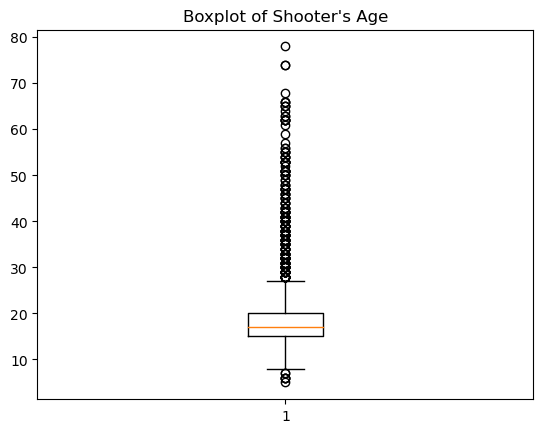

In [32]:
# Boxplot of age of shooter
plt.boxplot(shooter_t['Age'])
plt.title("Boxplot of Shooter's Age")

In [33]:

shooter_t['Race'].value_counts()
shooter_t['Shooter_Outcome'].value_counts()
shooter_t['Shooter_Died'].value_counts()
shooter_t['Injury'].value_counts()

None       1186
Suicide     179
Wounded      92
Fatal        27
Name: Injury, dtype: int64

In [40]:
situation_stats_df

,Situation,Number_Victims_x,Number_Victims_y
0,Indiscriminate Shooting,4.64,39
1,Racial,2.50,5
2,Psychosis,2.06,11
3,Hostage/Standoff,2.02,74
4,Bullying,1.71,15
5,Anger Over Grade/Suspension/Discipline,1.66,27
6,Escalation of Dispute,1.24,12
7,Drive-by Shooting,1.10,6
8,Unknown,1.06,5
9,Domestic w/ Targeted Victim,1.03,9


# Weapon

In [45]:
weapon.head()

,Incident_ID,Weapon_Type,Weapon_Caliber,Weapon_Details
0,20230329GANED,Handgun,NaN,NaN
1,20230327TNCON,Handgun,NaN,Handgun
2,20230327TNCON,Rifle,NaN,AR-15 style
3,20230327TNCON,Handgun,NaN,Submachine pistol
4,20230324INNOM,Handgun,NaN,NaN


In [46]:
weapon.columns

Index(['Incident_ID', 'Weapon_Type', 'Weapon_Caliber', 'Weapon_Details'], dtype='object')

In [54]:
weapon.isnull().sum()

Incident_ID       0
Weapon_Type       0
Weapon_Caliber    0
Weapon_Details    0
dtype: int64

In [52]:
# fill null values in weapon type with 'Unknown'
weapon['Weapon_Type'] = weapon['Weapon_Type'].fillna('Unknown')
weapon['Weapon_Caliber'] = weapon['Weapon_Caliber'].fillna('Unknown')
weapon['Weapon_Details'] = weapon['Weapon_Details'].fillna('Unknown')

In [55]:
weapon['Weapon_Type'].unique()

array(['Handgun', 'Rifle', 'Shotgun', 'Unknown', 'Other',
       'Multiple Handguns', 'Multiple Unknown', 'Multiple Rifles',
       'No Data'], dtype=object)

In [57]:
incidentWeapon = incident.merge(weapon, how='left', on='Incident_ID')

In [66]:
weapon_counts = incidentWeapon.groupby('Weapon_Type')['Victims_Killed'].count().reset_index()
weapon_counts = weapon_counts.sort_values('Victims_Killed', ascending=False)

# Victims

In [71]:
victim.head()

,Incident_ID,Injury,Gender,School_Affiliation,Age,Race
0,20230327TNCON,Fatal,Female,Student,9,NaN
1,20230327TNCON,Fatal,Male,Student,9,NaN
2,20230327TNCON,Fatal,Female,Student,9,NaN
3,20230327TNCON,Fatal,Male,Teacher,61,NaN
4,20230327TNCON,Fatal,Female,Teacher,61,NaN


In [79]:
victim['Age'].astype('')

TypeError: data type 'numerical' not understood

In [76]:
victim[victim['School_Affiliation'] == 'Student']['Age'].mean()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

# Dashboard

In [68]:
import dash
from dash import dcc
from dash import dash_table
from dash import html
import dash_bootstrap_components as dbc
import plotly.graph_objs as go

class MyApp:
    def __init__(self, incident, sum_killed, state_counts_df, shooter_t, mean_victims_situation_df, mean_victimskilled, situation_stats_df):
        self.incident = incident
        self.sum_killed = sum_killed
        self.state_counts_df = state_counts_df
        self.shooter_t = shooter_t
        self.mean_victims_situation_df = mean_victims_situation_df
        self.mean_victimskilled = mean_victimskilled
        self.situation_stats_df = situation_stats_df
        self.weapon_counts = weapon_counts
        self.app = dash.Dash(__name__, external_stylesheets=[dbc.themes.CERULEAN])
        self.set_layout()

    def set_layout(self):
        self.app.layout = html.Div(children=[
            html.H1(children='School Shooting Data Analysis'),
            dcc.Tabs(id="tabs", value='tab-1', children=[
                dcc.Tab(label='Introduction', value='tab-0', children=[
                    html.Div([
                        html.H2('Introduction'),
                        html.P('This dashboard is designed to present an analysis on school shootings data. Here you can find a number of graphs and tables, each providing unique insights:'),
                        html.P('1. "Counts by Year" tab: Shows the number of incidents per year.'),
                        html.P('2. "Victims Killed by Year" tab: Shows the number of victims killed per year.'),
                        html.P('3. "School Shootings by State" tab: Displays the total and fatal school shootings per state.'),
                        html.P('4. "Boxplot of Shooter\'s Age" tab: Provides a box plot of the shooter\'s age.'),
                        html.P('5. "Mean Victims Situation Table" tab: Gives a table of mean victims per situation.'),
                        html.P('6. "Weapon and Victims" tab: Shows the counts of victims for each weapon type.')
                    ])
                ]),
                dcc.Tab(label='Counts by Year', value='tab-1', children=[
                    dcc.Graph(id='graph1', figure=self.create_graph1_figure())
                ]),
                dcc.Tab(label='Victims Killed by Year', value='tab-2', children=[
                    dcc.Graph(id='line_chart', figure=self.create_line_chart_figure())
                ]),
                dcc.Tab(label='School Shootings by State', value='tab-3', children=[
                    dcc.Graph(id='graph2', figure=self.create_graph2_figure())
                ]),
                dcc.Tab(label="Boxplot of Shooter's Age", value='tab-4', children=[
                    dcc.Graph(id='box_plot', figure=self.create_box_plot_figure())
                ]),
                dcc.Tab(label='Mean Victims Situation Table', value='tab-5', children=[
                    html.Div(children=[
                        dash_table.DataTable(
                            id='table1',
                            columns=[{"name": i, "id": i} for i in self.mean_victims_situation_df.columns],
                            data=self.create_table().to_dict('records')
                        )
                    ], style={'width':'50%', 'display':'inline-block', 'fontFamily':'Arial, sans-serif'})
                ]),
                dcc.Tab(label='Weapon and Victims', value='tab-6', children=[
                    html.Div(children=[
                        dash_table.DataTable(
                            id='table2',
                            columns=[{"name": i, "id": i} for i in self.weapon_counts.columns],
                            data=self.weapon_counts.to_dict('records')
                        )
                    ], style={'width':'50%', 'display':'inline-block', 'fontFamily':'Arial, sans-serif'})
                ])
            ]),
        ], style={'fontSize':'24', 'fontFamily':'Arial, sans-serif'})


    def create_graph1_figure(self):
        count_by_year = self.incident.groupby('Year').size().reset_index(name='Counts')
        mean_count = count_by_year['Counts'].mean()

        return {
            'data': [
                go.Bar(
                    x=count_by_year['Year'],
                    y=count_by_year['Counts'],
                    name='Counts'
                ),
                go.Scatter(
                    x=count_by_year['Year'],
                    y=[mean_count]*len(count_by_year),
                    mode='lines',
                    name='Mean',
                    line=dict(
                        color='red',
                        dash='dash'
                    )
                )
            ],
            'layout': go.Layout(
                title='Count by Year',
                yaxis={'title': 'Counts'},
            )
        }

    def create_line_chart_figure(self):
        return {
            'data': [
                go.Scatter(
                    x=self.sum_killed['Year'],
                    y=self.sum_killed['Victims_Killed'],
                    mode='lines+markers',  # This creates a line chart with markers
                    name='Victims Killed'
                ),
                go.Scatter(
                    x=self.sum_killed['Year'],
                    y=[self.mean_victimskilled]*len(self.sum_killed),
                    mode='lines',
                    name='Mean Victims Killed',
                    line=dict(
                        dash='dash'
                    )
                )
            ],
            'layout': go.Layout(
                title='Victims Killed by Year',
                xaxis={'title': 'Year'},
                yaxis={'title': 'Number of Victims Killed'},
            )
        }

    def create_graph2_figure(self):
        return {
            'data': [
                go.Bar(
                    x=self.state_counts_df['State'],
                    y=self.state_counts_df['Total School Shootings'],
                    name='Total'
                ),
                go.Bar(
                    x=self.state_counts_df['State'],
                    y=self.state_counts_df['Fatal School Shootings'],
                    name='Fatal'
                )
            ],
            'layout': go.Layout(
                title='School Shootings by State',
                yaxis={'title': 'Total'},
                barmode='group'
            )
        }

    def create_box_plot_figure(self):
        return {
            'data': [
                go.Box(
                    y=self.shooter_t['Age'],
                    name="Shooter's Age"
                )
            ],
            'layout': go.Layout(
                title="Boxplot of Shooter's Age"
            )
        }

    def create_table(self):
        situation_stats_df['Number_Victims'] = situation_stats_df['Number_Victims'].round(2)
        return self.situation_stats_df

    def run(self, debug=False):
        self.app.run_server(debug=debug)

if __name__ == '__main__':
    # Assuming all the DataFrame variables and mean_victimskilled are defined earlier in your code.
    my_app = MyApp(incident, sum_killed, state_counts_df, shooter_t, mean_victims_situation_df, mean_victimskilled, situation_stats_df)
    my_app.run(debug=False)
